# ROC曲线
> ROC:Receiver Operation Characteristic Curve 描述TPR和FPR之间的关系

## TPR即召回率

![TPR](images/TPR.png)

## FPR
![FPR](images/FPR.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits() # 加载手写数字识别数据集
X = digits.data
y = digits.target.copy()
# 多分类问题转换为二分类问题，即等于9和不等于9,数据比例大约是1:9,也就是说我们只要全认为是非9，按照传统计算正确率的方法我们也有90%的正确率
y[digits.target==9] = 1
y[digits.target!=9] = 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9755555555555555

In [3]:
decision_scores = log_reg.decision_function(X_test)

In [4]:
# 所有的边界阈值
thresholds = np.arange(decision_scores.min(), decision_scores.max())

## 计算TPR和FPR

In [5]:
from playML.metrics import FPR, TPR

In [6]:
fprs = []
tprs = []

In [7]:
# 循环所有的边界阈值
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

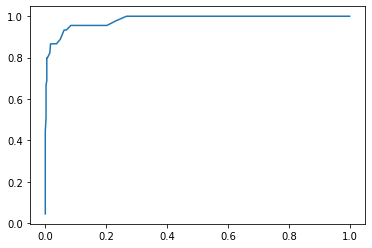

In [9]:
plt.plot(fprs, tprs)
plt.show()

## Scikit-learn中的ROC
+ ROC最主要用于比较两个模型孰优孰劣
+ ROC曲线下的面积越大代表模型越好
+ ROC曲线对极度偏斜的数据并不敏感，要比精准率-召回率曲线好很多

In [10]:
from sklearn.metrics import roc_curve

In [11]:
fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

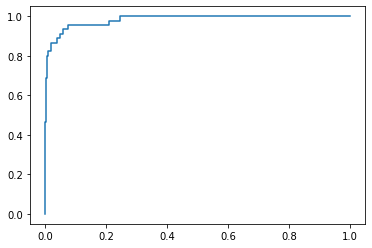

In [12]:
plt.plot(fprs, tprs)
plt.show()

### ROC曲线下面的面积计算

In [13]:
from sklearn.metrics import roc_auc_score

In [14]:
roc_auc_score(y_test, decision_scores) # ROC曲线下的面积，ROC

0.9830452674897119